# Networks: Friends, Epidemics & Terrorists
## Handout for Active Learning Exercise #

The goal of this ALE is to help you understand the basic concepts of network science and get acclimated to the `Networkx` (https://networkx.org/) library in Python.

In [1]:
# Make sure you run this code cell everytime you open the notebook!
import networkx as nx            # Import NetworkX library as nx for its network functions
import numpy as np               # Import NumPy library as np for its mathematical functions
import matplotlib.pyplot as plt  # Import Matplotlib library as plt for its plotting functions
import matplotlib as mplt        # Import Matplotlib library as plt for its plotting functions
!pip3 install networkit          # Install NetworkIt library
import networkit as nk           # Import networkit library for its katz similarity function         

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 8.3 MB/s 


## Similarity

### Structural Equivalence: Cosine Similarity and Jaccard Similarity

The cosine and Jaccard similarity indices measure the similarity between two sets of nodes. The scores can range from 0 to 1. The higher the number, the more similar the two sets of nodes.

In [2]:
# We will analyze an example network (for a Karate Club) from the NetworkX package
G = nx.karate_club_graph()

In [3]:
# A function defined for simple plotting
def plot_graph(G):
  pos = nx.drawing.layout.circular_layout(G)
  plt.figure(figsize=(10,10))                                                           # Specify the figure size
  nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_size=1000, \
        node_color='red', font_size=20, font_color='white',width=3, edge_color='green') # The figure properties
  plt.show()                                                                            # Show the network

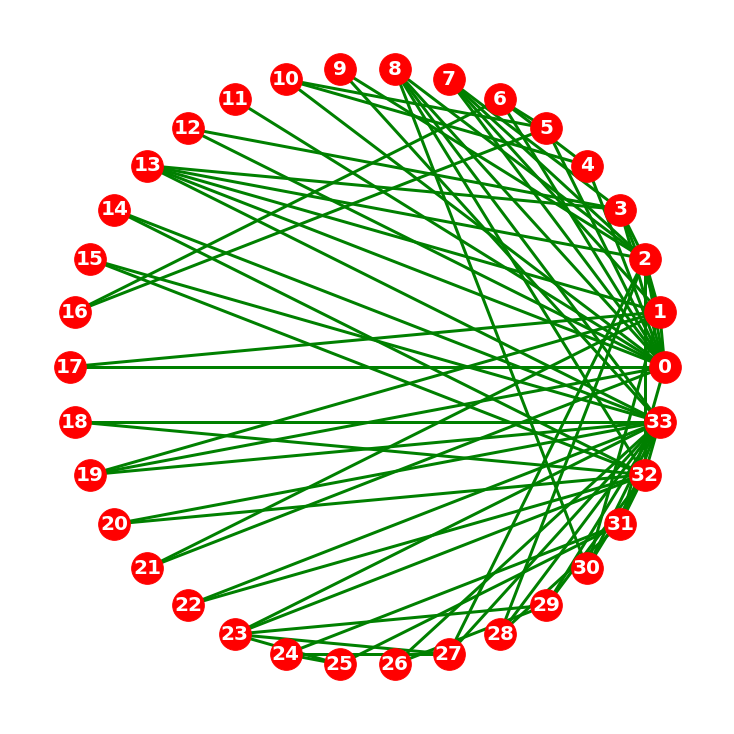

In [4]:
# Visualize the network
plot_graph(G)

## Cosine Similarity Function

In [ ]:
# Define the Cosine Similarity function
def cosine_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    degree1=len(list1)
    degree2=len(list2)
    return float(intersection) / np.sqrt(degree1*degree2)

## Jaccard Similarity Function

In [ ]:
# Define the Jaccard Similarity function
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

## Find Cosine and Jaccard similarity between two nodes

In [ ]:
# Find Cosine and Jaccard Similarity between the two nodes' neighbors
node1_neighbors = list(G.neighbors(1))                # List of neighbors for node 1
node4_neighbors = list(G.neighbors(4))                # List of neighbors for node 2
print("The similarity of nodes 1 and 4, measured by cosine similarity is: ", cosine_similarity(node1_neighbors, node4_neighbors)) # Cosine Similarity
print("The similarity of nodes 1 and 4, measured by Jaccard Coefficient is: ", jaccard(node1_neighbors, node4_neighbors))         # Jaccard Similarity

### Regular Equivalence: Katz Similarity

Katz similarity between nodes i and j is high if they have neighbors that have high similarity. 

In [ ]:
# We are using networkit library to find Katz similarity score
GNK=nk.nxadapter.nx2nk(G, weightAttr=None)               # Convert the NetworkX graph to a networkit graph
KatzIndex = nk.linkprediction.KatzIndex(GNK,5,0.005)     # Calculate Katz similarity score for the network  
print("The similarity of nodes 1 and 4, measured by Katz index is: ", KatzIndex.run(1, 4)) # Print the Katz similarity score between nodes 1 and 4.

### You can create and print a similarity matrix for Cosine, Jaccard and Katz similarity scores that shows similarity between each pair of nodes using:


In [ ]:
# This code creates and prints a similarity matrix for three similarity metrics: Cosine, Jaccard, and Katz
A_Cosine = np.zeros((nx.number_of_nodes(G), nx.number_of_nodes(G)))
A_Jaccard = np.zeros((nx.number_of_nodes(G), nx.number_of_nodes(G)))
A_Katz = np.zeros((nx.number_of_nodes(G), nx.number_of_nodes(G)))
for i in range(0,nx.number_of_nodes(G)):
  for j in range(0,nx.number_of_nodes(G)):
    A_Cosine[i][j] = cosine_similarity(list(G.neighbors(i)), list(G.neighbors(j)))
    A_Jaccard[i][j] = jaccard(list(G.neighbors(i)), list(G.neighbors(j)))
    A_Katz[i][j] = KatzIndex.run(i, j)
print("Cosine similarity matrix for each pair of nodes: ", A_Cosine)
print("Jaccard similarity matrix for each pair of nodes: ", A_Jaccard)
print("Katz similarity matrix for each pair of nodes: ", A_Katz)

## Assortativity

### Attribute Assortativity with unordered Characteristics

The function below computes assortativity for node attributes with unordered characteristics.

Assortativity measures the similarity of connections in the graph with respect to the given attribute. If the graph is weighted, provide an argument `weight`='weight'.

In [ ]:
# Define a new plotting function where you can provide different colors for nodes
def plot_graph_nodecolor(G):
  pos = nx.drawing.layout.circular_layout(G)
  plt.figure(figsize=(5,5))                                                             # Specify the figure size
  nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_size=1000, \
        node_color=color_map, font_size=20, font_color='white',width=3, edge_color='green') # The figure properties
  plt.show()                                                                            # Show the network

In [ ]:
G = nx.Graph()
# Define nodes with two different characteristics
group1_node_list=[1, 2, 3]                         # Nodes for Group 1
group2_node_list=[4, 5, 6]                         # Nodes for Group 2
G.add_nodes_from(group1_node_list, group="group1") # Add nodes for Group 1
G.add_nodes_from(group2_node_list, group="group2") # Add nodes for Group 2
G.add_edges_from([(1, 2), (1, 3), (2, 3), (4, 5), (4, 6), (5, 6)]) # Add links between nodes

color_map=[]        # We will plot Group 1 nodes as red, and Group 2 nodes as blue
for node in G:      
    if node in group1_node_list:
        color_map.append('red')
    else: 
        color_map.append('blue')  

print("Assortativity based on groups:", nx.attribute_assortativity_coefficient(G, "group")) # Print assortativity based on groups
plot_graph_nodecolor(G)                                                                     # Plot the network

In [ ]:
G2 = nx.Graph()                                    # Another example network
G2.add_nodes_from(group1_node_list, group="group1")
G2.add_nodes_from(group2_node_list, group="group2")
G2.add_edges_from([(1, 4), (1, 5), (2, 5), (2, 6), (3, 4), (3, 6)]) # Nodes are connected to the nodes from the other group
print("Assortativity based on groups:", nx.attribute_assortativity_coefficient(G2, "group")) # Print assortativity based on groups
plot_graph_nodecolor(G2)                                                                     # Plot the network

### Attribute Assortativity with Ordered Characteristics

The function below computes assortativity for node attributes with ordered characteristics.

Assortativity measures the similarity of connections in the graph with respect to the given attribute. If the graph is weighted, provide an argument `weight`='weight'.

In [ ]:
# Define a new plotting function where you can provide different colors for nodes
def plot_graph_nodecolor(G):
  pos = nx.drawing.layout.circular_layout(G)
  plt.figure(figsize=(5,5))                                                               # Specify the figure size
  nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_size=1000, \
        node_color=color_map, font_size=20, font_color='white',width=3, edge_color='green') # The figure properties
  plt.show()                                                                                # Show the network

In [ ]:
G = nx.Graph()                      # Create an empty network
G.add_nodes_from([0], attribute=2)  # Create nodes with specific attributes
G.add_nodes_from([1], attribute=1)
G.add_nodes_from([2], attribute=2)
G.add_nodes_from([3], attribute=0)
G.add_edges_from([(0, 1), (2, 3), (1, 3)])

colors = nx.get_node_attributes(G, "attribute")
color_map=[]
norm = mplt.colors.Normalize(vmin=min(colors), vmax=max(colors))
cmap = mplt.cm.ScalarMappable(norm=norm, cmap=mplt.cm.Blues)
for node in G.nodes():
    color_map.append(cmap.to_rgba(colors[node]+0.5))
print("Assortativity based on numeric attribute:", nx.numeric_assortativity_coefficient(G, "attribute")) # Print assortativity based on attribute
plot_graph_nodecolor(G)                                                                                  # Plot the network

### Degree Asssortativity
To compute degree assortativity of graph, use the function below.

It varies between 1 for a perfectly assortative network and -1 for a
perfectly disassortative one. If the graph is weighted, provide an argument `weight`='weight'.

In [ ]:
G = nx.path_graph(4)                         # Create a network path

colors = [val for (node, val) in G.degree()] # Create the color map based on the degree of nodes
color_map=[]
norm = mplt.colors.Normalize(vmin=min(colors), vmax=max(colors))
cmap = mplt.cm.ScalarMappable(norm=norm, cmap=mplt.cm.Blues)
for node in G.nodes():
    color_map.append(cmap.to_rgba(colors[node]+0.5))

print("Assortativity based on numeric attribute:", nx.degree_assortativity_coefficient(G)) # Print assortativity based on degree
plot_graph_nodecolor(G)                                                                    # Plot the network. Colored based on degree.

## Random Network Model 

Returns a random graph, also known as an Erdős-Rényi graph. A random graph has binomial degree distribution. For large N the distribution can be approximated with Poisson distribution.

The first constructor will create an Erdős-Rényi graph. The model chooses each of the possible edges with probability `p`, which you need to provide. `n` is the number of nodes.

In [ ]:
# Create an Erdős-Rényi graph with 50 nodes and a probability of 0.01 for link creation
seed = 20160    # We use a seed for random number generator for reproducibility
G = nx.erdos_renyi_graph(n=50,p=0.01,directed=False,seed=seed)
plot_graph(G) 

To create a random graph with specified number of nodes and edges, use the following function:





In [ ]:
# Create random network to analyze
n = 50         # 50 nodes
m = 30          # 20 edges
seed = 20160    # We use a seed for random number generator for reproducibility
G = nx.gnm_random_graph(n, m, seed=seed)
plot_graph(G)

### Random Network Analysis

Now, we will analyze a random network with n nodes and m edges. When analyzing a network, we want to focus on the following aspects:

In [ ]:
G = nx.gnm_random_graph(n=100, m=300, seed=271203)

## Giant and Small Components

In [ ]:
# This function is used for undirected graphs only
components = list(nx.connected_components(G))                                 # Create the list of connected components
print("The number of connected components in network G is:", len(components)) # Number of components
print("List of connected components: ", components)                           # Print the list of components
print("The largest connected component is: ", max(components, key=len))       # Largest component of network
print("The smallest connected component is: ", min(components, key=len))      # Smallest component of network
print("Network is connected?:", nx.is_connected(G))                           # Check whether the network is connected

In [ ]:
# Plotting the biggest component of the network for visualization
fig = plt.figure("Degree of a random network", figsize=(20, 20))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])
GCC = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(GCC, seed=10396953)
nx.draw_networkx_nodes(GCC, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(GCC, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

### Min Degree, Max Degree, and Average Degree


In [ ]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)     # Sort the degrees into decreasing order
dmax = max(degree_sequence)                                            # Maximum degree
dmin = min(degree_sequence)                                            # Minimum degree
dmean = 2*G.number_of_edges()/G.number_of_nodes()                      # Average degree
print("The list of degrees of network G sorted in decreasing order: ", degree_sequence)
print("The maximum degree of network G is: ", dmax)
print("The minimum degree of network G is: ", dmin)
print("The average degree of network G is: ", dmean)

### Degree Distribution

A large erdos-renyi network has a **Poisson degree** distribution. To plot the degree distribution of network G:

In [ ]:
# Visualize function
def degree_distribution(G):
  fig = plt.figure("Degree of a random network", figsize=(20, 12))
  axgrid = fig.add_gridspec(5, 4)
  degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
  ax2 = fig.add_subplot(axgrid[3:, 2:])
  ax2.bar(*np.unique(degree_sequence, return_counts=True))
  ax2.set_title("Degree Distribution Histogram")
  ax2.set_xlabel("Degree")
  ax2.set_ylabel("# of Nodes")
  fig.tight_layout()
  plt.show()

# You just need to input the name of Graph (parameter)
degree_distribution(G)

### Average Path Length, Maximum Path Length, Minimum Path Length

Here we are concerned with the shortest path between each pair of nodes in the biggest connected component of network G.


In [ ]:
G = G.subgraph(max(components, key=len))       # Only analyze giant component
p = dict(nx.shortest_path_length(G))           # Map shortest path length to each pair of nodes

In [ ]:
def path_len_freq(p):
  d = {}
  for i in p.keys():
    for p_len in p[i].values():
      if p_len != 0:
        if p_len not in d.keys():
          d[p_len] = 0
        d[p_len] += 1
  return d

In [ ]:
d = path_len_freq(p)    
path_length_sequence =  {k: d[k]/2 for k in d}    # For undirected graph
print("The minimum path length of the network: ", min(path_length_sequence)) 
print("The average path length of the network: ", nx.average_shortest_path_length(G))            # Average Path Length     
print("The maximum path length of the network: ", max(path_length_sequence))                     # Longest path length
print("The diameter of the network: ", nx.diameter(G))                                           # Diameter is also the longest path length

### Path Length Distribution

In [ ]:
def path_len_distribution(G, path_len_sequence):
  fig = plt.figure("Path length of a random network", figsize=(20, 12))
  axgrid = fig.add_gridspec(5, 4)
  ax2 = fig.add_subplot(axgrid[3:, 2:])
  ax2.bar(path_length_sequence.keys(), list(path_length_sequence.values()), align='center')
  ax2.set_title("Path Length Distribution Histogram")
  ax2.set_xlabel("Path Length")
  ax2.set_ylabel("# of Paths")
  fig.tight_layout()
  plt.show()

# You just need to input the name of Graph (parameter)
path_len_distribution(G, path_length_sequence)

### Average Clustering Coefficient, Maximum and Minimum Clustering Coefficient 

In [ ]:
clustering = dict(sorted(nx.clustering(G).items(), key=lambda item: item[1],reverse=True))
print("The local clustering coefficients of all nodes ", nx.clustering(G))              # The local clustering coefficients of all nodes
print("Average clustering coefficient: ", nx.average_clustering(G))                     # Average clustering coefficient
print("The minimum clustering coefficient of the network: ", min(clustering.values()))                      # Minimum clustering coefficient 
print("The maximum clustering coefficient of the network: ", max(clustering.values()))                      # Maximum clustering coefficient 

### Clustering Coefficient Distribution

In [ ]:
def clustering_coef_distribution(G, clustering):
  fig, (ax2) = plt.subplots(ncols=1, figsize=(12,10))
  ax2.hist(clustering.values(), bins=10)
  ax2.set_title("Clustering Coefficient Distribution Histogram")
  ax2.set_xlabel("Clustering Coefficient")
  ax2.set_ylabel("# of Nodes")
  fig.tight_layout()
  plt.show()

# You just need to input the name of Graph (parameter)
clustering_coef_distribution(G, clustering)

## Watts_Strogatz Model of the Small World

This function creates a Watts–Strogatz small-world graph. You need to provide `n`: The number of nodes, `k`: the number of nearest neighbors a node is joined with, `p`: The probability of rewiring each edge. `seed` is an optional argument to for the generation state.

In [ ]:
SG = nx.watts_strogatz_graph(n=30, k=3, p=1/3)
plot_graph(SG)

## Summary of Random Network Analysis

Now, we will put all analysis into analyzing a RANDOM WEIGHTED NETWORK.

In [ ]:
from random import randint
WG = nx.gnp_random_graph(500, 0.3, 201)
nx.set_edge_attributes(G, {e: {'weight': randint(1, 5)} for e in WG.edges})

In [ ]:
# GIANT AND SMALL COMPONENTS
components = list(nx.connected_components(WG))                       # Create the list of connected components
print("List of components: ", components)                            # Print the list of components
print("The number of connected components in network G is:", len(components)) # Number of components
print("The largest component is: ", max(components, key=len))        # Largest component of network
print("The smallest component is: ", min(components, key=len))       # Smallest component of network
print("Network is connected?:", nx.is_connected(WG))                 # Check whether the network is connected

In [ ]:
# DEGREE DISTRIBUTION, MIN DEGREE, MAX DEGREE, AVERAGE DEGREE
degree_sequence = sorted((d for n, d in WG.degree(weight='weight')), reverse=True)     # Sort the degrees into decreasing order
print("The list of degrees of network G sorted in decreasing order: ", degree_sequence)
print("The maximum degree of network G is: ", max(degree_sequence) )   # Maximum degree
print("The minimum degree of network G is: ", min(degree_sequence) )   # Minimum degree
print("The average degree of network G is: ",  2*WG.number_of_edges()/WG.number_of_nodes())                   # Average degree
degree_distribution(WG)                                                                                       # Degree distribution

The minimum path length of the network:  1
The average path length of the network:  1.6965290581162324
The maximum path length of the network:  2
The diameter of the network:  2


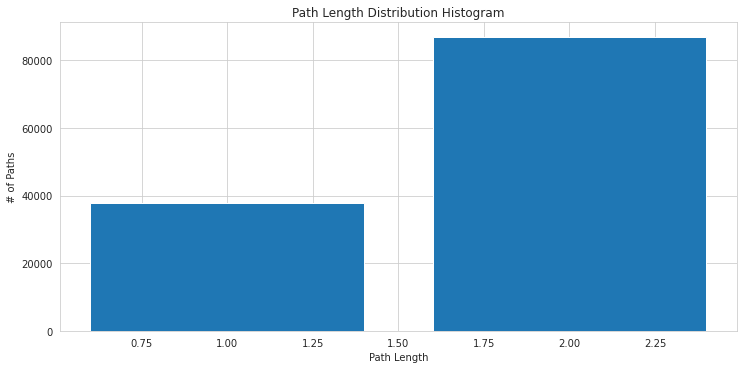

In [ ]:
# PATH LENGTH DISTRIBUTION, AVERAGE PATH LENGTH, MIN PATH LENGTH, MAX PATH LENGTH FOR THE LARGEST COMPONENT
G = WG.subgraph(max(components, key=len))
p = dict(nx.shortest_path_length(G,weight='weight'))
d = path_len_freq(p)    
path_length_sequence =  {k: d[k]/2 for k in d}    # For undirected graph
print("The minimum path length of the network: ", min(path_length_sequence)) 
print("The average path length of the network: ", nx.average_shortest_path_length(G))            # Average Path Length     
print("The maximum path length of the network: ", max(path_length_sequence))                     # Longest path length
print("The diameter of the network: ", nx.diameter(G))                                           # Diameter is also the longest path length
path_len_distribution(G, path_length_sequence)

In [ ]:
# CLUSTERING COEFFICIENT DISTRIBUTION, AVERAGE CLUSTERING COEFFICIENT, MIN/MAX CLUSTERING COEFFICIENT
clustering = dict(sorted(nx.clustering(G).items(), key=lambda item: item[1],reverse=True))
print("The local clustering coefficients of all nodes ", nx.clustering(G))              # The local clustering coefficients of all nodes
print("Average clustering coefficient: ", nx.average_clustering(G))                     # Average clustering coefficient
print("The minimum clustering coefficient of the network: ", min(clustering.values()))                      # Minimum clustering coefficient 
print("The maximum clustering coefficient of the network: ", max(clustering.values()))                      # Maximum clustering coefficient 
clustering_coef_distribution(G, clustering)                                                                 # Clustering Coefficient distribution